<a href="https://colab.research.google.com/github/Bhargavikeshoju/2216158_AIML_Bootcamp_2023/blob/main/Maruti(casestudy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/SUV_Purchase.csv")


In [ ]:
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
#Data preprocessing
from sklearn import preprocessing

#Label encoding
le=preprocessing.LabelEncoder()

#fitting the technique to dataset
df.Gender=le.fit_transform(df.Gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


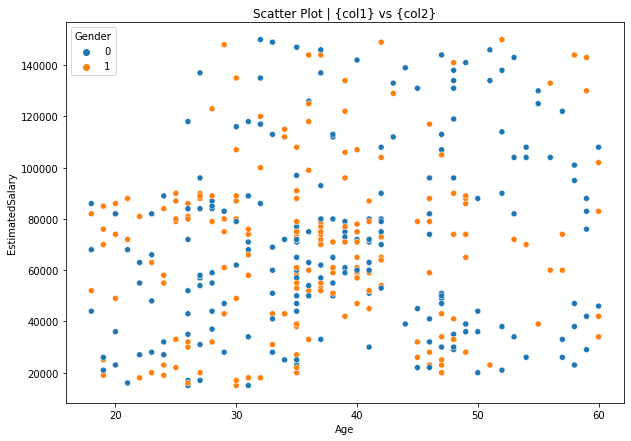

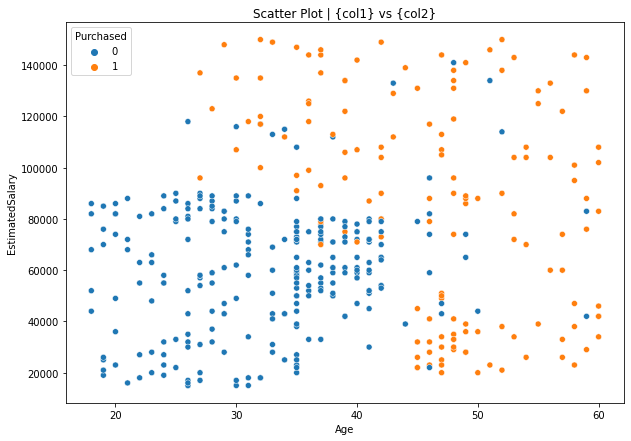

In [ ]:
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

def plot_vs(frame,col1,col2,hue):
  plt.figure(figsize=(10,7))
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)
  plt.title("Scatter Plot | {col1} vs {col2}")
          
plot_vs(df,'Age','EstimatedSalary','Gender')
plot_vs(df,'Age','EstimatedSalary','Purchased')


In [ ]:
#Feature Engineering-delete the columns gender & user id

df=df.drop(['User ID','Gender'],axis=1)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
#Mehod-1 :loading the data
X=df.iloc[:,:-1].values #2D array
Y=df.iloc[:,-1:].values

In [ ]:
#method2
X1=np.array(df[['Age','EstimatedSalary']])
Y1=np.array(df[['Purchased']])

In [ ]:
#splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train) #normalizing
X_train=sst.transform(X_train)

In [ ]:
#Building the model
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()


In [ ]:
clf.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
clf.score(sst.transform(X),Y)

0.3575

In [ ]:
clf.score(X_train,Y_train)

0.7375

In [ ]:
clf.score(X_test,Y_test)

0.275